In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


# Features Explanation
* Country : Ülke adı
* Region  : Ülkenin bulunduğu bölge
* Happiness Rank : Mutluluk puanına göre ülkenin sıralaması
* Happiness Score: Mutluluk puanı
* Economy (GDP per Capita) :  Kişi başına düşen GSYİH'in mutluluk puanına katkı oranı
* Family : Ailenin mutluluk puanına katkı oranı
* Health (Life Expectancy) : Sağlığın  mutluluk puanına katkı oranı
* Freedom : Özğürlüğün mutluluk puanına katkı oranı
* Trust : Yolsuzluk algısının mutluluk puanına katkı oranı
* Generosity  : Cömertliğin mutluluk puanına katkı oranı

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px

# Data Exploration

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
x = 2015
dff = []
while True:
    globals()[f'df{x}'] = pd.read_csv(f'/kaggle/input/world-happiness/{x}.csv')
    dff.append(globals()[f'df{x}'])
    x += 1
    if x == 2020:
        break

In [5]:
for i, df in enumerate(dff):
    print (f'201{i+5} dataset:')
    display (dff[i].head(3))

2015 dataset:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


2016 dataset:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


2017 dataset:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


2018 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


2019 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


# Data Cleaning

In [6]:
df2015.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [7]:
df2016.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [8]:
df2017.rename(columns = {'Happiness.Rank' : 'Happiness Rank',
                        'Happiness.Score' : 'Happiness Score',
                        'Economy..GDP.per.Capita.' : 'GDP',
                        'Health..Life.Expectancy.' : 'Life',
                        'Dystopia.Residual' : 'Dystopia Residual',
                        'Trust..Government.Corruption.' : 'Trust'}, inplace = True)

In [9]:
df2018.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)

In [10]:
df2019.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)

In [11]:
for i, df in enumerate(dff, 2015):
    df['Year'] = i

In [12]:
for df in dff:
    if not ('Region') in df:
        df['Region'] = None
        temp = df.set_index('Country').Region.fillna(df2015.set_index('Country').Region).reset_index()
        df.fillna(temp, inplace = True)

In [13]:
for i, df in enumerate(dff, 2015):
    print ('\n' f'df{i} dataset:' '\n', df.isnull().sum())


df2015 dataset:
 Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
GDP                  0
Family               0
Life                 0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
Year                 0
dtype: int64

df2016 dataset:
 Country                      0
Region                       0
Happiness Rank               0
Happiness Score              0
Lower Confidence Interval    0
Upper Confidence Interval    0
GDP                          0
Family                       0
Life                         0
Freedom                      0
Trust                        0
Generosity                   0
Dystopia Residual            0
Year                         0
dtype: int64

df2017 dataset:
 Country              0
Happiness Rank       0
Happiness Score      0
Whisker.high         0
Whisker.low          0
GDP                  0
Family               0
Life                 0
Fre

In [14]:
fuldf = pd.concat(dff)

# Data Visualisation

In [15]:
df2015 = pd.read_csv("../input/world-happiness/2015.csv")
df2015.drop("Standard Error", axis=1,inplace=True)
df2015["Year"] = 2015
df2015.columns = ["Country","Region","Happiness Rank","Happiness Score","GDP","Family","Life","Freedom","Trust","Generosity","Dystopia Residual","Year"]

df2016 = pd.read_csv("../input/world-happiness/2016.csv")
df2016.drop(["Lower Confidence Interval", "Upper Confidence Interval"],axis=1,inplace=True)
df2016["Year"] = 2016
df2016.columns=["Country", "Region", "Happiness Rank", "Happiness Score", "GDP", "Family", "Life", "Freedom", "Trust", "Generosity", "Dystopia Residual", "Year"]

df2017 = pd.read_csv("../input/world-happiness/2017.csv")
df2017.drop(["Whisker.high","Whisker.low"],axis=1,inplace=True)
df2017["Year"]= 2017
df2017.columns=["Country", "Happiness Rank", "Happiness Score", "GDP", "Family", "Life", "Freedom","Generosity", "Trust", "Dystopia Residual", "Year"]


country_region = df2015[["Country","Region"]]
country_region = country_region.to_numpy()

def make_region(Country):
    for i in range(len(country_region)):
        if Country == country_region[i][0]:
            return country_region[i][1]
    
    return "no_region"

df2017["Region"] = df2017["Country"].apply(make_region)

df2017.loc[32,"Region"] = 'Eastern Asia'
df2017.loc[49,"Region"] = 'Latin America and Caribbean'
df2017.loc[70,"Region"] = 'Eastern Asia'
df2017.loc[92,"Region"] = 'Sub-Saharan Africa'
df2017.loc[110,"Region"] = 'Sub-Saharan Africa'
df2017.loc[146,"Region"] =  'Sub-Saharan Africa'

df2018 = pd.read_csv("../input/world-happiness/2018.csv")
df2018["Year"] =2018
df2018.columns = [ "Happiness Rank","Country", "Happiness Score", "GDP", "Family", "Life", "Freedom","Generosity", "Trust", "Year"]
df2018["Dystopia Residual"] = df2018["Happiness Score"] - df2018["GDP"] - df2018["Family"] - df2018["Life"] - df2018["Freedom"] - df2018["Generosity"] - df2018["Trust"]
df2018["Region"] = df2018["Country"].apply(make_region)
df2018.loc[37,"Region"] = 'Latin America and Caribbean'
df2018.loc[48,"Region"] = 'Latin America and Caribbean'
df2018.loc[57,"Region"] = 'Central and Eastern Europe'
df2018.loc[97,"Region"] = 'Sub-Saharan Africa'
df2018.loc[118,"Region"] = 'Sub-Saharan Africa'
df2018.loc[153,"Region"] = 'Sub-Saharan Africa'

df2019 =pd.read_csv("../input/world-happiness/2019.csv")
df2019["Year"] = 2019
df2019.columns =[ "Happiness Rank","Country", "Happiness Score", "GDP", "Family", "Life", "Freedom","Generosity", "Trust", "Year"]
df2019["Dystopia Residual"] = df2019["Happiness Score"] - df2019["GDP"] - df2019["Family"] - df2019["Life"] - df2019["Freedom"] - df2019["Generosity"] - df2019["Trust"]
df2019["Region"] = df2019["Country"].apply(make_region)
df2019.loc[38,"Region"] = 'Latin America and Caribbean'
df2019.loc[63,"Region"] = 'Central and Eastern Europe'
df2019.loc[83,"Region"] = 'Central and Eastern Europe'
df2019.loc[111,"Region"] = 'Sub-Saharan Africa'
df2019.loc[112,"Region"] = 'Sub-Saharan Africa'
df2019.loc[119,"Region"] = 'Sub-Saharan Africa'
df2019.loc[155,"Region"] = 'Sub-Saharan Africa'

In [16]:
df_tmp = fuldf.groupby(["Region","Year"])["Happiness Score"].mean()
df_tmp = pd.DataFrame(df_tmp).unstack()
df_tmp = df_tmp.reset_index()
df_tmp.columns=["Region","2015","2016","2017","2018","2019"]
df_tmp = df_tmp.melt("Region")
fig = px.bar(df_tmp.sort_values(by="value"), x="Region", y="value",animation_frame='variable',text="value",color="Region",
             height=600,title = 'Yıllara göre bölgelerin mutluluk oranının değişimi')
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.update_layout(transition = {'duration': 1000})
fig.show()

In [17]:
df_1 = pd.concat([df2015.melt(id_vars=['Country','Year','Happiness Score','Happiness Rank','Region']),
                 df2016.melt(id_vars=['Country','Year','Happiness Score','Happiness Rank','Region']),],ignore_index=True)
fig = px.bar(df_1[df_1["Happiness Rank"] <=10].sort_values(by="Happiness Score"), y="Country", x="value", color='variable',animation_frame='Year',
             height=700,title="2015-2016 Yılları Arası Mutluluk Değişimi",opacity=.2,text="value")
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.update_layout(transition = {'duration': 1000})
fig.show()

In [18]:
df_2 = pd.concat([df2016.melt(id_vars=['Country','Year','Happiness Score','Happiness Rank','Region']),
                 df2017.melt(id_vars=['Country','Year','Happiness Score','Happiness Rank','Region']),],ignore_index=True)
fig = px.bar(df_2[df_2["Happiness Rank"] <=10].sort_values(by="Happiness Score"), y="Country", x="value", color='variable',animation_frame='Year',
             height=700,title="2016-2017 Yılları Arası Mutluluk Değişimi",opacity=.2,text="value")
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.update_layout(transition = {'duration': 1000})
fig.show()

In [19]:
df1 = pd.read_csv('../input/world-happiness/2015.csv')

In [20]:
df2 = pd.read_csv('../input/world-happiness/2016.csv')

In [21]:
df3 = pd.read_csv('../input/world-happiness/2017.csv')

In [22]:
df4 = pd.read_csv('../input/world-happiness/2018.csv')

In [23]:
df5 = pd.read_csv('../input/world-happiness/2019.csv')

In [24]:
import plotly.express as px
happiest_countries = fuldf.groupby(['Country'], sort = False)['Happiness Score', 'Year', 'GDP'].max()
top10 = happiest_countries.sort_values('Happiness Score', ascending = False)[:15]
fig = px.scatter(top10,
                x = top10.index,
                y = 'Happiness Score',
                size = 'GDP',
                color = top10.index,
                template = 'xgridoff',
                animation_frame = 'Year',
                title = 'En Mutlu 15 Ülke')
fig.show()

In [25]:
df2015 = df1.iloc[:20,:]
df2016 = df2.iloc[:20,:]
df2017 = df3.iloc[:20,:]
df2018 = df4.iloc[:20,:]
df2019 = df5.iloc[:20,:]

import plotly.graph_objs as go
v1 =go.Scatter(
                    x = df2015['Country'],
                    y = df2015['Happiness Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'red'),
                    text= df2015.Country)

v2 =go.Scatter(
                    x = df2015['Country'],
                    y = df2016['Happiness Score'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'green'),
                    text= df2016.Country)

v3 =go.Scatter(
                    x = df2015['Country'],
                    y = df2017['Happiness.Score'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'blue'),
                    text= df2017.Country)


v4 =go.Scatter(
                    x = df2015['Country'],
                    y = df2018['Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'black'),
                    text= df2017.Country)


v5 =go.Scatter(
                    x = df2015['Country'],
                    y = df2019['Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'pink'),
                    text= df2017.Country)


data = [v1, v2, v3, v4, v5]
layout = dict(title = 'En iyi 20 ülke arasındaki mutluluk oranının yıllara göre değişimi',
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 5,zeroline= False),
              hovermode="x unified"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [26]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = df1['Country'],
        locationmode = "country names",
        z = df1['Happiness Score'],
        text = df1['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = ' 2015 yılı Dünya Mutluluk Haritası',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [27]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = df2['Country'],
        locationmode = "country names",
        z = df2['Happiness Score'],
        text = df2['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = ' 2016 yılı Dünya Mutluluk Haritası',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [28]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = df3['Country'],
        locationmode = "country names",
        z = df3['Happiness.Score'],
        text = df3['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = ' 2017 yılı Dünya Mutluluk Haritası',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [29]:
fuldf['Happiness Change'] = (df5['Score'] - df1['Happiness Score']) / df1['Happiness Score']
temp = fuldf[np.abs(fuldf['Happiness Change']) > 0.01]
temp = fuldf.sort_values('Happiness Change')
temp['Year'] = temp['Year'].astype(str)
fig = px.bar(temp,
             x = 'Happiness Change',
             y = 'Country',
             color = 'Year',
             orientation = 'h',
             height = 900,
             template = 'gridon',
             title = '2015-2017 yılları arasında mutluluk oranının değişimi')
fig.show()

In [30]:
fig = px.scatter(fuldf,
                x = 'GDP',
                y = 'Happiness Score',
                size = 'Freedom',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                title = '2015 - 2019 Yılları arasındaki GDP * Mutluluk Oranını ve kabarcık Özğürlüğün Mutluluk oranına katkıtısını gösterir') 
fig.show()

In [31]:
fig = px.scatter(fuldf,
                x = 'Life',
                y = 'Happiness Score',
                size = 'GDP',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                labels = {'Life': 'Life Expectancy'},
                title = '2015 - 2017 yılları arasında ki Sağlıgın * Mutluluk oranının ve kabarcıklar GDP mutluluk oranına katkısı ')
fig.show()

In [32]:
import plotly.express as px

df2015 = pd.read_csv('../input/world-happiness/2015.csv')
df = df2015

fig = px.sunburst(df, path=['Region', 'Country'], values='Happiness Score',
                  color='Happiness Score', hover_data=['Happiness Rank'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Happiness Score'], weights=df['Happiness Score']))
fig.update_layout(hovermode="x unified")
fig.show()

In [33]:
fuldf.drop(labels=['Upper Confidence Interval'],axis=1,inplace=True)
fuldf.drop(labels=['Dystopia Residual'],axis=1,inplace=True)
fuldf.drop(labels=['Whisker.high'],axis=1,inplace=True)
fuldf.drop(labels=['Whisker.low'],axis=1,inplace=True)
fuldf.drop(labels=['Standard Error'],axis=1,inplace=True)  

In [34]:
fuldf.drop(labels=['Lower Confidence Interval'],axis=1,inplace=True)

<AxesSubplot:>

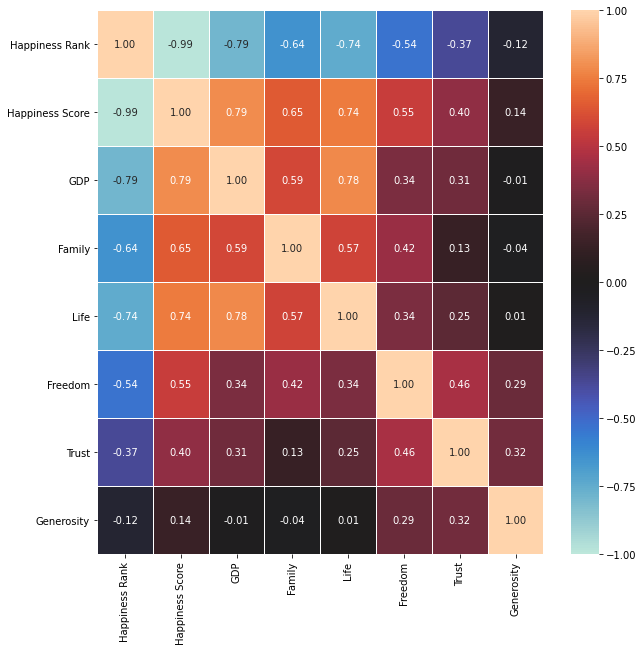

In [35]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(1,1,1)

sns.heatmap(fuldf.iloc[:,0:10].corr(), annot=True, fmt=".2f", linewidths=.5,vmin=-1, vmax=1, center= 0,ax=ax1) 

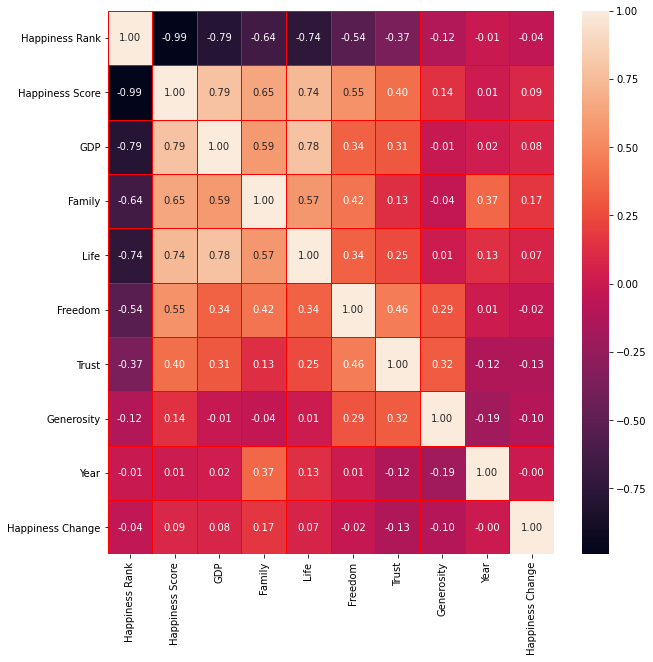

In [36]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(fuldf.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax)
plt.show()

In [37]:
import plotly.figure_factory as ff
z = pd.DataFrame(fuldf.corr().values.tolist())
z = z.round(2).values.tolist()
fig = ff.create_annotated_heatmap(z, x = fuldf.corr().columns.tolist(), y = fuldf.corr().columns.tolist(), colorscale = 'Portland')
fig.update_layout(title = {'text': 'Correlation Heatmap', 'y' : 0.93, 'x' : 0.5}, title_font_size = 25)
fig.show()

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

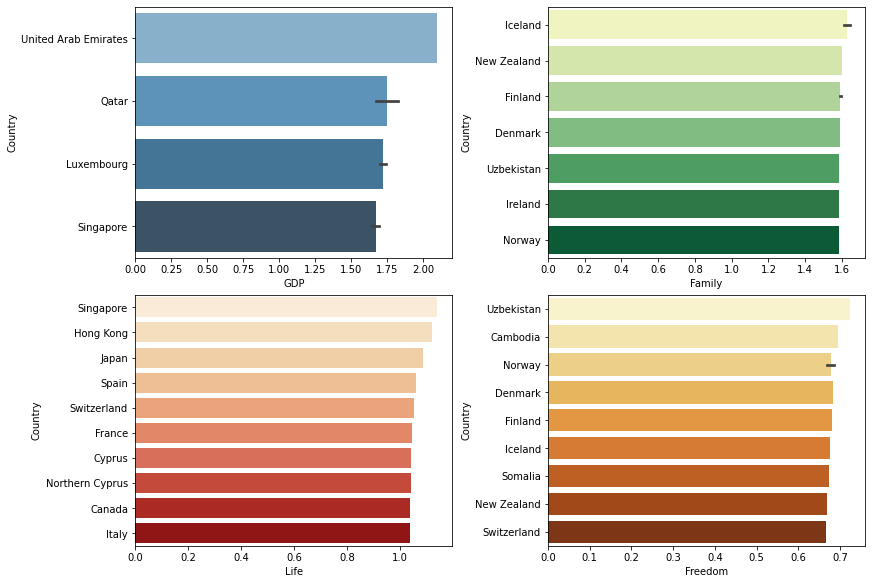

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP',y='Country',data=fuldf.nlargest(10,'GDP'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Family' ,y='Country',data=fuldf.nlargest(10,'Family'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Life' ,y='Country',data=fuldf.nlargest(10,'Life'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country',data=fuldf.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Trust', ylabel='Country'>

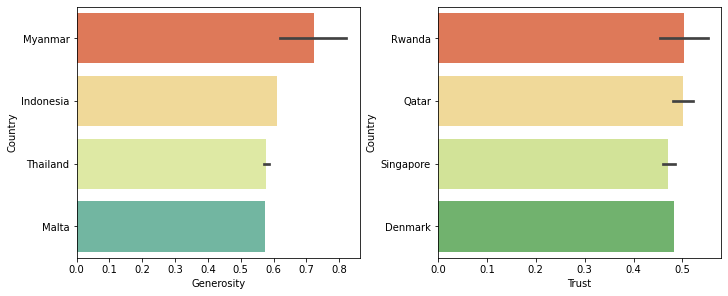

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country',data=fuldf.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Trust' ,y='Country',data=fuldf.nlargest(10,'Trust'),ax=axes[1],palette='RdYlGn')

Data içerinde bulunan öznitelikleri kategorik olarak sıralamak ve ayrım yapmak.

In [40]:
fuldf.tail()

,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life,Freedom,Trust,Generosity,Year,Happiness Change
151,Rwanda,Sub-Saharan Africa,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,2019,-0.070532
152,Tanzania,Sub-Saharan Africa,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,2019,-0.096224
153,Afghanistan,Southern Asia,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,2019,-0.075613
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2019,-0.076946
155,South Sudan,NaN,156,2.853,0.306,0.575,0.295,0.010,0.091,0.202,2019,-0.050898


In [41]:
fuldf = fuldf.rename(columns = {'Happiness Score': 'Score' })
fuldf['Trust'].fillna(value=fuldf['Trust'].mean(),inplace=True)
fuldf['Happiness Change'].fillna(value=fuldf['Happiness Change'].mean(),inplace=True)

In [42]:
fulldf=pd.concat(dff)
fulldf = fulldf.rename(columns = {'Happiness Score': 'Score' })
fulldf=fulldf[['Country','Score','Region','GDP']]
fulldf

,Country,Score,Region,GDP
0,Switzerland,7.587,Western Europe,1.39651
1,Iceland,7.561,Western Europe,1.30232
2,Denmark,7.527,Western Europe,1.32548
3,Norway,7.522,Western Europe,1.45900
4,Canada,7.427,North America,1.32629
...,...,...,...,...
151,Rwanda,3.334,Sub-Saharan Africa,0.35900
152,Tanzania,3.231,Sub-Saharan Africa,0.47600
153,Afghanistan,3.203,Southern Asia,0.35000
154,Central African Republic,3.083,Sub-Saharan Africa,0.02600


In [43]:
fulldf=fulldf.groupby(['Country']).mean().reset_index()
fulldf

,Country,Score,GDP
0,Afghanistan,3.51280,0.357113
1,Albania,4.71260,0.938633
2,Algeria,5.66760,1.012963
3,Angola,3.87225,0.798380
4,Argentina,6.45940,1.111035
...,...,...,...
165,Venezuela,5.53140,1.052468
166,Vietnam,5.15460,0.723416
167,Yemen,3.62580,0.489313
168,Zambia,4.58440,0.571761


In [44]:
print('max:',fulldf['Score'].max())
print('min:',fulldf['Score'].min())
abc=fulldf['Score'].max()-fulldf['Score'].min()
scr=round(abc/3,3)
print('aradaki fark:',(scr))

max: 7.545999967193604
min: 3.078999994277954
aradaki fark: 1.489


In [45]:
düsük=fulldf['Score'].min()+scr
orta=düsük+scr

print('düsük scr in üst sınırı',düsük)
print('orta scr in üst sınırı',orta)
print('yüksek scr in üst sınırı','max:',fulldf['Score'].max())

düsük scr in üst sınırı 4.567999994277954
orta scr in üst sınırı 6.0569999942779535
yüksek scr in üst sınırı max: 7.545999967193604


In [46]:
sıra=[]
for i in fulldf.Score:
    if(i>0 and i<düsük):
        sıra.append('Düşük')
        
        
    elif(i>düsük and i<orta):
         sıra.append('Orta')
    else:
         sıra.append('Yüksek')

fulldf['Category']=sıra 

In [47]:
color = (fulldf.Category == 'Yüksek' ).map({True: 'background-color: red ',False:'background-color: yellow',True: 'background-color: limegreen'})
fulldf.reset_index(drop=True).style.apply(lambda s: color)

,Country,Score,GDP,Category
0,Afghanistan,3.512800,0.357113,Düşük
1,Albania,4.712600,0.938633,Orta
2,Algeria,5.667600,1.012963,Orta
3,Angola,3.872250,0.798380,Düşük
4,Argentina,6.459400,1.111035,Yüksek
5,Armenia,4.393200,0.839133,Düşük
6,Australia,7.276200,1.394885,Yüksek
7,Austria,7.142000,1.398341,Yüksek
8,Azerbaijan,5.229200,1.073644,Orta
9,Bahrain,6.113800,1.390482,Yüksek


In [48]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [49]:
fulldf = world.merge(fulldf, how="left", left_on=['name'], right_on=['Country'])

<AxesSubplot:title={'center':'5 Yıllık Ortalama Mutluluk Kategorileri'}>

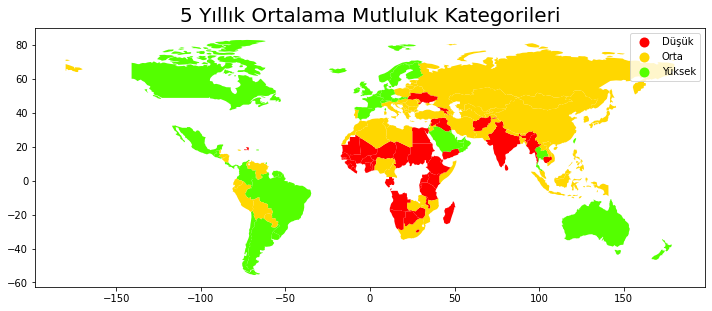

In [50]:
fig, ax = plt.subplots(figsize  = (12, 8))
ax.set_title("5 Yıllık Ortalama Mutluluk Kategorileri", fontsize=20)
fulldf.plot(column='Category',ax=ax,legend=True,cmap='prism')

In [51]:
df_tr = df_tr = fuldf["Country"]=="Turkey"
fuldf[df_tr]

,Country,Region,Happiness Rank,Score,GDP,Family,Life,Freedom,Trust,Generosity,Year,Happiness Change
75,Turkey,Middle East and Northern Africa,76,5.332,1.060980,0.946320,0.731720,0.228150,0.157460,0.122530,2015,0.018380
77,Turkey,Middle East and Northern Africa,78,5.389,1.164920,0.877170,0.647180,0.238890,0.123480,0.047070,2016,0.022399
68,Turkey,Middle East and Northern Africa,69,5.500,1.198274,1.337753,0.637606,0.300741,0.099672,0.046693,2017,0.007515
73,Turkey,Middle East and Northern Africa,74,5.483,1.148000,1.380000,0.686000,0.324000,0.109000,0.106000,2018,0.012595
78,Turkey,Middle East and Northern Africa,79,5.373,1.183000,1.360000,0.808000,0.195000,0.106000,0.083000,2019,0.022844


In [52]:
df_turkey = fuldf[fuldf["Country"] =="Turkey"]

#fig = px.line(df_turkey,x="Year",y="Happiness Rank",text="Happiness Rank",title="Yıllara Göre Türkiye Mutluluk Sıralaması")
#fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
#fig.show()

import plotly.express as px
fig = px.line(df_turkey, x='Year', y='Happiness Rank', color='Country')
fig.update_layout(
    yaxis = dict(autorange="reversed")
)
fig.show()

In [53]:
df_fitre = (fuldf['Country']=="Turkey")| (fuldf['Country']=="Greece") | (fuldf["Country"]=="Armenia") | (fuldf["Country"]=="Syria")
fuldf[df_fitre]


,Country,Region,Happiness Rank,Score,GDP,Family,Life,Freedom,Trust,Generosity,Year,Happiness Change
75,Turkey,Middle East and Northern Africa,76,5.332,1.060980,0.946320,0.731720,0.228150,0.157460,0.122530,2015,0.018380
101,Greece,Western Europe,102,4.857,1.154060,0.929330,0.882130,0.076990,0.013970,0.000000,2015,0.005353
126,Armenia,Central and Eastern Europe,127,4.350,0.768210,0.777110,0.729900,0.198470,0.039000,0.078550,2015,0.015632
155,Syria,Middle East and Northern Africa,156,3.006,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790,2015,-0.050898
77,Turkey,Middle East and Northern Africa,78,5.389,1.164920,0.877170,0.647180,0.238890,0.123480,0.047070,2016,0.022399
98,Greece,Western Europe,99,5.033,1.248860,0.754730,0.800290,0.058220,0.041270,0.000000,2016,0.013946
120,Armenia,Central and Eastern Europe,121,4.360,0.860860,0.624770,0.640830,0.140370,0.036160,0.077930,2016,-0.001108
155,Syria,Middle East and Northern Africa,156,3.069,0.747190,0.148660,0.629940,0.069120,0.172330,0.483970,2016,-0.050898
68,Turkey,Middle East and Northern Africa,69,5.500,1.198274,1.337753,0.637606,0.300741,0.099672,0.046693,2017,0.007515
86,Greece,Western Europe,87,5.227,1.289487,1.239415,0.810199,0.095731,0.043290,0.000000,2017,0.024205


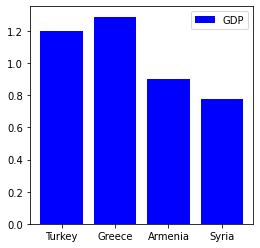

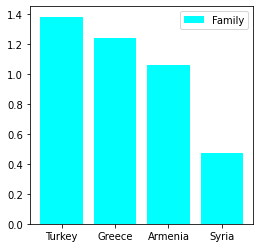

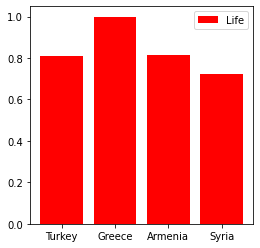

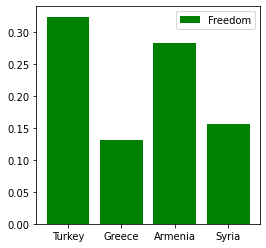

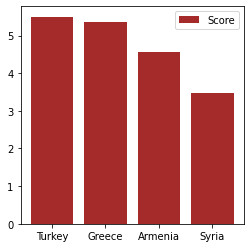

In [54]:
countries = [i for i in fuldf[df_fitre]["Country"]]

features = ["GDP","Family","Life","Freedom","Score"]

colors = ["Blue","Cyan","Red","Green","Brown","Pink"]

features_colors = list(zip(features,colors))

def barplot_creator(country_list,feature_color_list,fuldf):
    for f,c in feature_color_list:
        _,ax = plt.subplots(figsize = (4,4))
        ax.bar(country_list,fuldf[f],color=c,label=f)
        plt.legend(loc = "upper right")
        plt.show()
        

barplot_creator(countries,features_colors,fuldf[df_fitre])

In [55]:
df_hapy = fuldf.pivot_table(index=["Country","Year"],values="Score")
df_hapy = df_hapy.unstack()
df_hapy = df_hapy.reset_index()
df_hapy.columns = ["Country","2015","2016","2017","2018","2019"]
df_hapy  = df_hapy.dropna()
df_hapy  = df_hapy.reset_index(drop=True)
for i in range(len(df_hapy)):
    df_hapy.loc[i,"min"] = min(df_hapy.loc[i,"2015"],df_hapy.loc[i,"2016"],df_hapy.loc[i,"2017"],df_hapy.loc[i,"2018"],df_hapy.loc[i,"2019"])

for i in range(len(df_hapy)):
    df_hapy.loc[i,"max"] = max(df_hapy.loc[i,"2015"],df_hapy.loc[i,"2016"],df_hapy.loc[i,"2017"],df_hapy.loc[i,"2018"],df_hapy.loc[i,"2019"])

for i in range(len(df_hapy)):
    df_hapy.loc[i,"difference"] = df_hapy.loc[i,"max"]-df_hapy.loc[i,"min"]

In [56]:
df_hapy.sort_values(by="difference",ascending=False).head(2)

,Country,2015,2016,2017,2018,2019,min,max,difference
136,Venezuela,6.81,6.084,5.250,4.806,4.707,4.707,6.810,2.103
12,Benin,3.34,3.484,3.657,4.141,4.883,3.340,4.883,1.543


In [57]:
df_venezuela = fuldf[fuldf["Country"] =="Venezuela"]

fig = px.bar(df_venezuela,x="Year",y="Score",color="Score",text="Score",title="Venezuela'nın Mutluluk Azalması")
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.show()

In [58]:
df_Benin = fuldf[fuldf["Country"]=="Benin"]
fig = px.bar(df_Benin,x="Year",y="Score",color="Score",text="Score",title="Benin'in mutluluk artışı")
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.show()

# Machine Learning

In [59]:
X = fuldf.drop(['Score', 'Happiness Rank', 'Country','Region'],axis=1)
y = fuldf['Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear Model

In [60]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

sonuc_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
sonuc_lm['Diff'] = y_test - y_pred
sonuc_lm.head()

,Actual,Predict,Diff
67,5.525,5.704931,-0.179931
17,6.886,6.544874,0.341126
36,6.344,6.285846,0.058154
14,7.119,6.730779,0.388221
145,3.781,4.465686,-0.684686


Mean Absolute Error: 0.4374875018244369
Mean Squared Error: 0.3058819391400654
Root Mean Squared Error: 0.553065944657656
R^2 of train set0.7716222268487614
R^2 of test set0.7702006025207905


<AxesSubplot:xlabel='Actual', ylabel='Predict'>

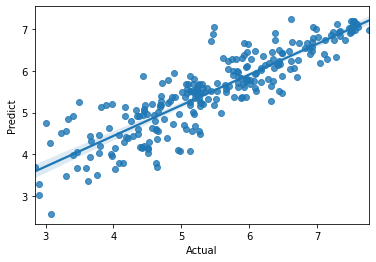

In [61]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R^2 of train set{lm.score(X_train, y_train)}")
print(f"R^2 of test set{lm.score(X_test, y_test)}")
sns.regplot(x='Actual',y='Predict',data=sonuc_lm)

In [62]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm,X,y,cv=5))

[0.69196491 0.66409249 0.782165   0.78638843 0.76929833]


In [63]:
scores = cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
print("MAE(mean):%",scores.mean())

MAE(mean):% -0.4239677432696853


# Random Forest Regressor

In [64]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

sonuc_rf = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
sonuc_rf['Diff'] = y_test - y_pred
sonuc_rf.head()

,Actual,Predict,Diff
67,5.525,5.53966,-0.01466
17,6.886,6.69658,0.18942
36,6.344,6.27269,0.07131
14,7.119,7.07570,0.04330
145,3.781,3.67547,0.10553


Mean Absolute Error: 0.3036776779418515
Mean Squared Error: 0.26473583686269914
Root Mean Squared Error: 0.5145248651549302
R^2 of train set0.9796743981627369
R^2 of test set0.8011123638968913


<AxesSubplot:xlabel='Actual', ylabel='Predict'>

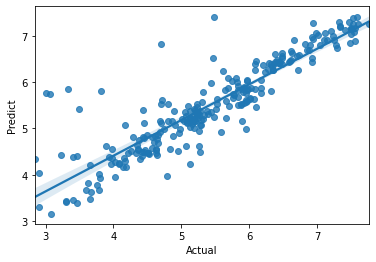

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R^2 of train set{rf.score(X_train, y_train)}")
print(f"R^2 of test set{rf.score(X_test, y_test)}")

sns.regplot(x='Actual',y='Predict',data=sonuc_rf)

In [66]:
print(cross_val_score(rf,X,y,cv=5))

[0.84098974 0.8146471  0.89578933 0.91532811 0.74572165]


In [67]:
scores_1 = cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
print("MAE(mean):%",scores_1.mean())

MAE(mean):% -0.29792885973845373


# MODEL EXPLAINABILITY

In [68]:
import shap
regressor = ensemble.RandomForestRegressor()
regressor.fit(X_train, y_train);

In [69]:

explainer = shap.TreeExplainer(regressor)

shap_values = explainer.shap_values(X_train)

In [70]:
features_1 = X.columns

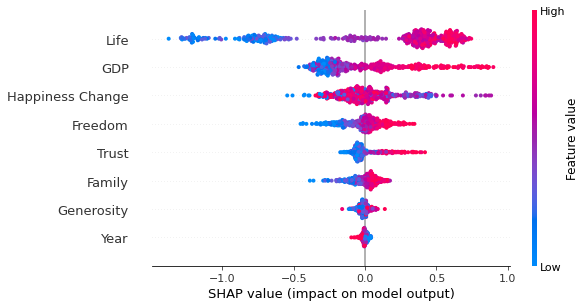

In [71]:
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

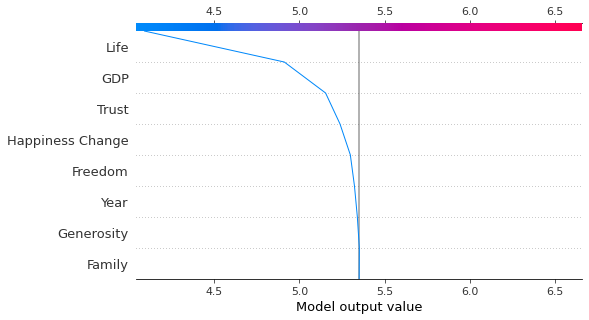

In [72]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(features_1))

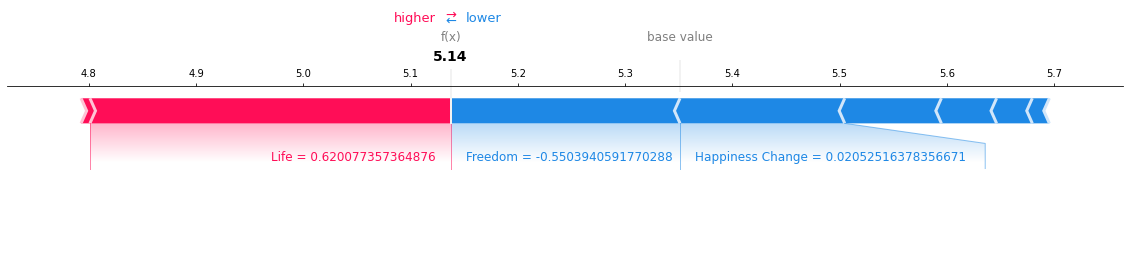

In [73]:
i = 18
shap.force_plot(explainer.expected_value, shap_values[i], X_test[i], feature_names = features_1,matplotlib=True)

In [74]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [75]:
distortions = []
K = range(1, 10)
 
for k in K:
  
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])

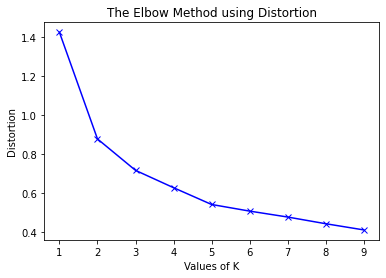

In [76]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [77]:
labels = KMeans(2, random_state=0).fit_predict(X)

In [78]:
dflength = len(fuldf['Trust'])
fuldf['labels'] = pd.Series(np.random.rand(dflength),index=fuldf.index)

In [79]:
tsne_data  = fuldf.drop(['Country', 'Region', 'Happiness Rank', 'Year', 'Happiness Change'],axis=1)

In [80]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(tsne_data)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=tsne_data.labels, labels={'color': 'labels'}
)
fig.update_traces(marker_size=8)
fig.show()

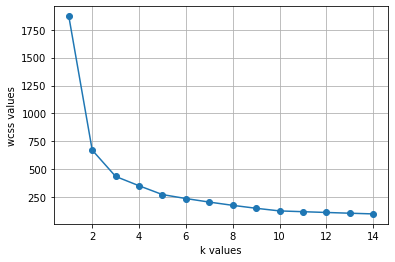

In [81]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("k values")
plt.ylabel("wcss values")
plt.show()

In [82]:
X_1  = fuldf.drop(['Score', 'Happiness Rank', 'Country', 'Region','Trust','Freedom','Family','Generosity','Happiness Change','Year'],axis=1)

In [83]:
df_2=fuldf.copy()
km2=KMeans(n_clusters=2)
clusters=km2.fit_predict(X_1)
df_2["clusters"]=clusters




df_1=fuldf.copy()
km1=KMeans(n_clusters=3)
clusters=km1.fit_predict(X_1)
df_1["clusters"]=clusters

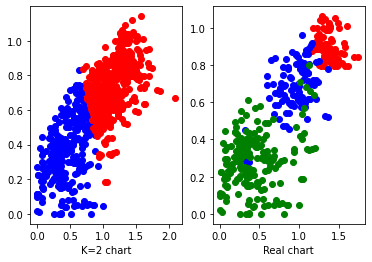

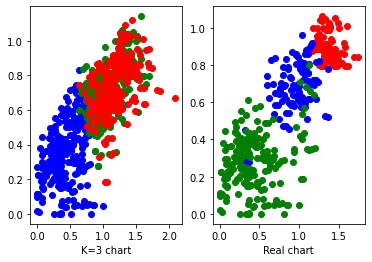

In [84]:
plt.subplot(1,2,1)
plt.scatter(df_2["GDP"][df_2.clusters==0],
            df_2["Life"][df_2.clusters==0],color="b")

plt.scatter(df_2["GDP"][df_2.clusters==1],
            df_2["Life"][df_2.clusters==1],color="r")
plt.xlabel("K=2 chart")

plt.subplot(1,2,2)
plt.scatter(fuldf["GDP"][fuldf.Region=="Western Europe"],
            fuldf["Life"][fuldf.Region=="Western Europe"],color="r")

plt.scatter(fuldf["GDP"][fuldf.Region=="Latin America and Caribbean"],
            fuldf["Life"][fuldf.Region=="Latin America and Caribbean"],color="b")

plt.scatter(fuldf["GDP"][fuldf.Region=="Sub-Saharan Africa"],
            fuldf["Life"][fuldf.Region=="Sub-Saharan Africa"],color="g")
plt.xlabel("Real chart")
plt.show()




plt.subplot(1,2,1)
plt.scatter(df_2["GDP"][df_2.clusters==0],
            df_2["Life"][df_2.clusters==0],color="b")

plt.scatter(df_1["GDP"][df_1.clusters==1],
            df_1["Life"][df_1.clusters==1],color="g")

plt.scatter(df_1["GDP"][df_1.clusters==2],
            df_1["Life"][df_1.clusters==2],color="r")
plt.xlabel("K=3 chart")

plt.subplot(1,2,2)
plt.scatter(fuldf["GDP"][fuldf.Region=="Western Europe"],
            fuldf["Life"][fuldf.Region=="Western Europe"],color="r")

plt.scatter(fuldf["GDP"][fuldf.Region=="Latin America and Caribbean"],
            fuldf["Life"][fuldf.Region=="Latin America and Caribbean"],color="b")

plt.scatter(fuldf["GDP"][fuldf.Region=="Sub-Saharan Africa"],
            fuldf["Life"][fuldf.Region=="Sub-Saharan Africa"],color="g")
plt.xlabel("Real chart")
plt.show()